In [1]:
%config IPCompleter.greedy=True

In [2]:
import os

In [3]:
path="F:\Project Learning Data"

In [4]:
os.chdir(path)

In [5]:
os.getcwd()

'F:\\Project Learning Data'

# Import Dataset

In [6]:
import pandas as pd

In [7]:
nyc=pd.read_csv("NYC_train.csv",parse_dates=['pickup_datetime'],nrows=500000)

# parse_dates parameter allows certain column as dates,provide flexibility to work with such datetime values

In [8]:
nyc.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
nyc.shape

(500000, 8)

In [10]:
# Visualizing geo location data 

In [11]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

In [12]:
nyct = nyc.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    nyct = nyct[(nyct[long] > nyc_min_longitude) & (nyct[long] <
                                                 nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    nyct = nyct[(nyct[lat] > nyc_min_latitude) & (nyct[lat] < 
                                               nyc_max_latitude)]

In [13]:
nyct.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
#identifying the landmarks in newyorkcity

In [15]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

In [16]:
#And here's our function using matplotlib to plot the pickup locations on a scatterplot:

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plot_lat_long(nyc, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(nyc.pickup_longitude), list(nyc.pickup_latitude), 
                 '.', markersize=1)
    else:
        plt.plot(list(nyc.dropoff_longitude), list(nyc.dropoff_latitude), 
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], 
                '*', markersize=15, alpha=1, color='r') 
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, 
                     landmarks[landmark][1]+0.005), color='r', 
                     backgroundcolor='w') 

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

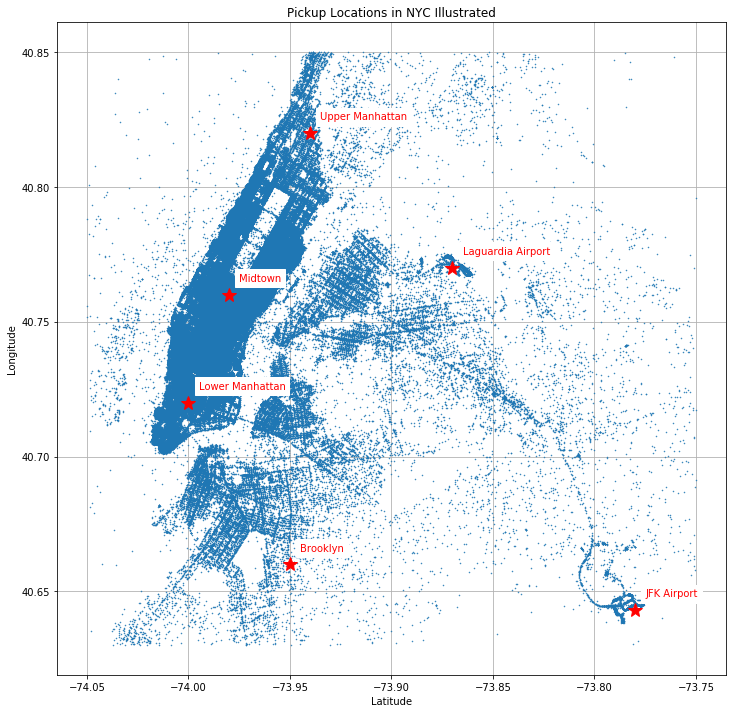

In [19]:
plot_lat_long(nyct, landmarks, points='Pickup')

## insight:most pickups were around the Midtown area, followed by Lower Manhattan
## Pickups are sparse outside Manhattan. The only two outliers were at LaGuardia Airport and JFK Airport
              

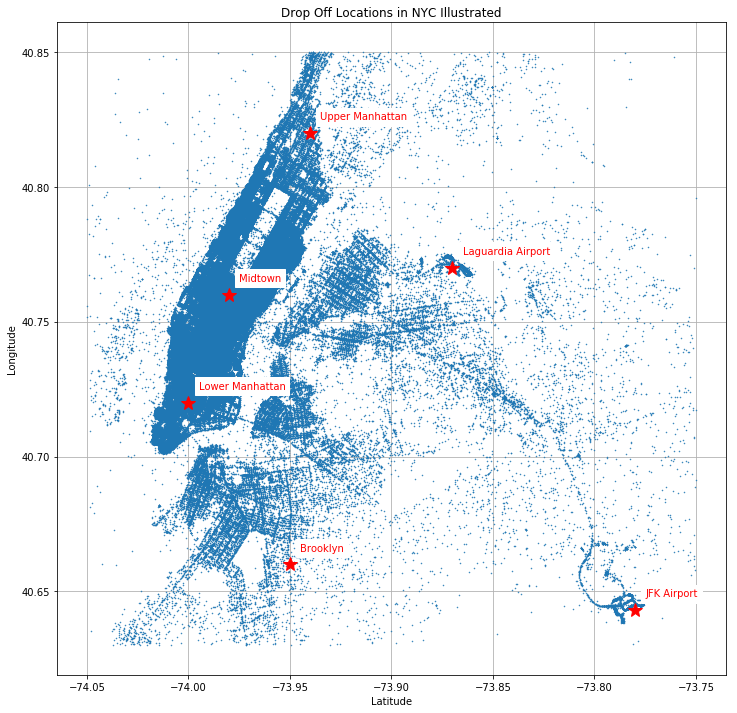

In [20]:
plot_lat_long(nyct, landmarks, points='Drop Off')

# Comparing the pickup and drop off scatterplots, we can clearly see that there are more drop offs than pickups in residential areas such as upeer manhattan and brooklyn

# Ridership by day and hour

In [21]:
#let's separate the pickup year, month, day, day of week, and hour from the original pickup_datetime

In [22]:
nyc['year'] = nyc['pickup_datetime'].dt.year
nyc['month'] = nyc['pickup_datetime'].dt.month
nyc['day'] = nyc['pickup_datetime'].dt.day
nyc['day_of_week'] = nyc['pickup_datetime'].dt.dayofweek
nyc['hour'] = nyc['pickup_datetime'].dt.hour

In [23]:
#let's plot a histogram to analyze the distribution of rides throughout the week

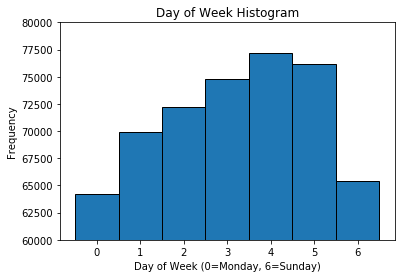

In [24]:
import numpy as np
nyc['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', 
                            ylim=(60000,80000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

#rides increases linearly from Monday through Friday, and peaking on Friday
The weekends see a slight drop in the number of rides on Saturday, before falling sharply on Sunday

In [25]:
#visualize rideship by hour

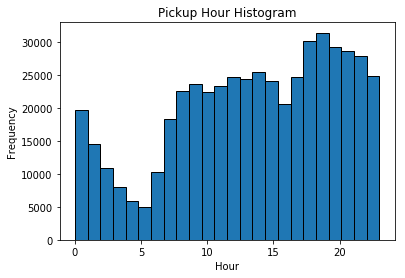

In [26]:
nyc['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

#We can see that there are more rides during the evening rush hour, as compared to the morning rush hour. In fact, the number of rides is pretty constant throughout the day. Starting at 6 P.M., the number of rides increases and peaks at 7 P.M., before falling from 11 P.M. onwards.

# Data Preprocessing

In [27]:
# Handling missing values and data anamolies

In [28]:
print(nyc.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


#With a missing data percentage of just 0.001%, it seems that we don't have a problem with missing data. Let's go ahead and remove those five rows with missing data

In [29]:
nyc=nyc.dropna()

In [30]:
nyc.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


The lowest fare in the dataset is $-44.90. That doesn't make sense; fares can't be negative!  Also, the highest fare is $500. Did the passenger get ripped off? Or was it just an error? Let's plot a histogram to better understand the distribution of fares:

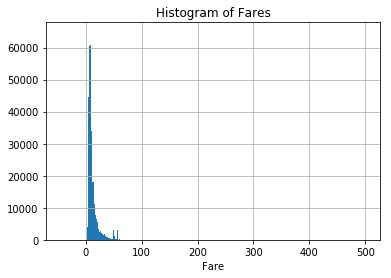

In [31]:
nyc['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

it doesn't seem too many outliers ,also observe from the histogram is that there is a small spike in fares around $50
Cities usually implement fixed fares for trips to and from airports. A quick Google search tells us that trips to and from JFK airport incurs a flat fare of $52 plus tolls. This could be the reason for the spike in the histogram around $50!

In [32]:
#let's remove rows with fares less than $0 and more than $100

In [33]:
nyc = nyc[(nyc['fare_amount'] >=0) & (nyc['fare_amount'] <= 100)]

In [34]:
#passenger count distribution

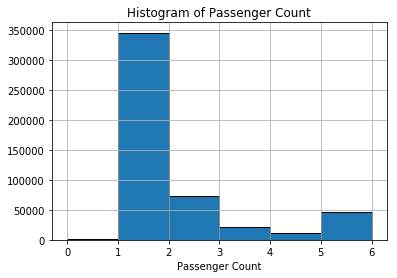

In [35]:
nyc['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

We can see that there's a small percentage of rows with 0 passenger counts. Instead of discarding those rows, let's replace the outliers with the mode (that is, 1 passenger count)

In [36]:
nyc.loc[nyc['passenger_count']==0, 'passenger_count'] = 1

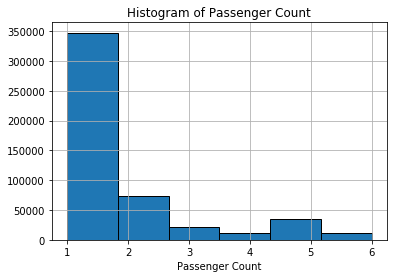

In [37]:
nyc['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

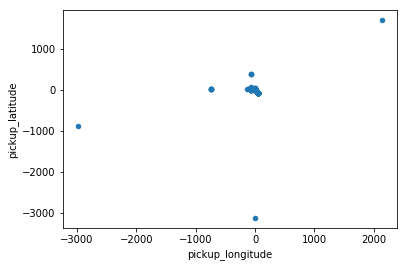

In [38]:
nyc.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

 The dots at the periphery of the scatterplot are outliers. They have latitude values as high as 1000 and as low as -3000. Earth's geographic coordinate system does not have such extreme latitudes and longitudes! Let's remove these outliers:

In [39]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

# only consider locations within NYC
for long in ['pickup_longitude', 'dropoff_longitude']:
    nyc = nyc[(nyc[long] > nyc_min_longitude) & (nyc[long] <
                                              nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    nyc = nyc[(nyc[lat] > nyc_min_latitude) & (nyc[lat] < 
                                            nyc_max_latitude)]

In [40]:
os.getcwd()

'F:\\Project Learning Data'

# Feature Engineering

In [41]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [42]:
nyc = nyc.drop(['pickup_datetime'], axis=1)

In [43]:
nyc.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [44]:
#Geolocation feature

Therefore, let's create a new feature that calculates the distance between each pair of pickup and drop off points.

Recall from geometry that the Euclidean Distance is the straight-line distance between any two points:

Let's define a function to calculate the Euclidean distance between any two points, given the latitude and longitudes of the two points:

In [45]:
def euc_distance(lat1, long1, lat2, long2):
    return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

In [46]:
nyc['distance'] = euc_distance(nyc['pickup_latitude'],
                              nyc['pickup_longitude'], 
                              nyc['dropoff_latitude'],
                              nyc['dropoff_longitude'])

In [47]:
nyc.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470


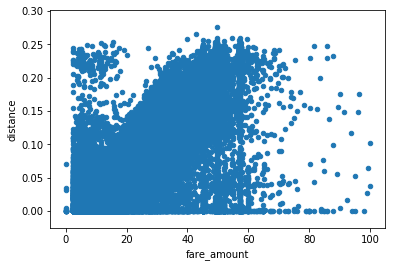

In [48]:
nyc.plot.scatter('fare_amount', 'distance')
plt.show()

If we look at the center of the graph, we can see three vertical lines of dots. These outlier data seems to suggest that there are certain trips where the distance traveled did not have an impact on the fare amount (which is between $40 and $60 for these outliers). Recall in the previous section on data visualization where we saw that there are certain pickups near airports, and these airport pickups have a flat fare of $52 plus tolls. This could explain the three vertical lines of dots between $40 and $60!

Clearly, we need to engineer a new feature that informs our neural network of the pickup and drop off distance from the three major airports in NYC. When we train the neural network on this feature, it should then learn that pickups and drop offs near airports have a flat fare between $40 and $60.

We can use the euc_distance function that we defined earlier to calculate the pickup and drop off distance from the three major airports in NYC:

In [49]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    nyc['pickup_dist_' + airport] = euc_distance(nyc['pickup_latitude'],
                                                nyc['pickup_longitude'], 
                                                airports[airport][1], 
                                                airports[airport][0])
    nyc['dropoff_dist_' + airport] = euc_distance(nyc['dropoff_latitude'], 
                                                 nyc['dropoff_longitude'],
                                                 airports[airport][1], 
                                                 airports[airport][0])

In [50]:
print(nyc[['key', 'pickup_longitude','pickup_latitude',
          'dropoff_longitude','dropoff_latitude', 
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head())

                             key  pickup_longitude  pickup_latitude  \
0    2009-06-15 17:26:21.0000001        -73.844311        40.721319   
1    2010-01-05 16:52:16.0000002        -74.016048        40.711303   
2   2011-08-18 00:35:00.00000049        -73.982738        40.761270   
3    2012-04-21 04:30:42.0000001        -73.987130        40.733143   
4  2010-03-09 07:51:00.000000135        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  pickup_dist_JFK_Airport  \
0         -73.841610         40.712278                 0.101340   
1         -73.979268         40.782004                 0.245731   
2         -73.991242         40.750562                 0.234714   
3         -73.991567         40.758092                 0.225895   
4         -73.956655         40.783762                 0.225847   

   dropoff_dist_JFK_Airport  
0                  0.092710  
1                  0.242961  
2                  0.237050  
3                  0.240846  
4                  0

In [51]:
nyc = nyc.drop(['key'], axis=1)

In [52]:
nyc.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


# Feature Scaling

As a final preprocessing step, we should also scale our features before passing them to the neural network.
scaling ensures that all features have a uniform range of scale. This ensures that features with a greater scale (for example, year has a scale of > 2000) does not dominate features with a smaller scale (for example, passenger count has a scale between 1 to 6).

Before we scale the features in the DataFrame, it's a good idea to keep a copy of the prescaled DataFrame. The values of the features will be transformed after scaling (for example, year 2010 may be transformed to a value such as -0.134 after scaling), which can make it difficult for us to interpret the values. By keeping a copy of the prescaled DataFrame, we can easily reference the original values:

In [53]:
nyc_prescaled = nyc.copy()

In [54]:
nyc_scaled = nyc.drop(['fare_amount'], axis=1)

In [55]:
#scale the feature by calling the scale function from scikit-learn

In [56]:
from sklearn.preprocessing import scale

In [57]:
nyc_scaled= scale(nyc_scaled)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Lastly, convert the object returned by the scale function into a pandas DataFrame and concatenate the original fare_amount column that was dropped before scaling:

In [58]:
cols = nyc.columns.tolist()
cols.remove('fare_amount')
nyc_scaled = pd.DataFrame(nyc_scaled, columns=cols, index=nyc.index)
nyc_scaled = pd.concat([nyc_scaled, nyc['fare_amount']], axis=1)
nyc = nyc_scaled.copy()

# Model Building in Python Using Keras

we're going to build our model layer by layer in Keras using the Sequential class.

First, split the DataFrame into the training features (X) and the target variable that we're trying to predict (y):

In [59]:
X = nyc.loc[:, nyc.columns != 'fare_amount'] 
y = nyc.loc[:, 'fare_amount']

In [60]:
#split data using train test split function

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

let's build our Sequential model in Keras 

In [64]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


we can compile and train our neural network on the training data

In [66]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
386750/386750 [==============================] - 17s 44us/step - loss: 13.9544 - mean_squared_error: 13.9544


# We can create a function to make a prediction using a random sample from the testing set:

In [67]:
def predict_random(nyc_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, 
                                                              high=10000))
    idx = sample.index[0]

    actual_fare = nyc_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                 'Saturday', 'Sunday']
    day_of_week = day_names[nyc_prescaled.loc[idx,'day_of_week']]
    hour = nyc_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))

    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))  
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

The predict_random function will pull a random row from the testing set and feed it to the model for prediction. The function will then calculate and display the RMSE of the prediction. Note that df_prescaled is required to provide us with the original values for day of week and hour, as the values in the testing set have already been transformed earlier and are no longer human-readable (for example, a day of week value of -0.018778 does not make much sense to us).

In [68]:
#Let's run the predict_random function, shown as follows and see what kind of results we get:

In [69]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Tuesday, 7:00hrs
Actual fare: $8.50
Predicted fare: $7.74
RMSE: $0.76


In [70]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Saturday, 13:00hrs
Actual fare: $19.00
Predicted fare: $17.55
RMSE: $1.45


In [71]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Friday, 9:00hrs
Actual fare: $11.50
Predicted fare: $12.38
RMSE: $0.88


In [72]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Wednesday, 11:00hrs
Actual fare: $4.50
Predicted fare: $7.16
RMSE: $2.66


In [73]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Thursday, 14:00hrs
Actual fare: $16.50
Predicted fare: $14.94
RMSE: $1.56


In [74]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Saturday, 11:00hrs
Actual fare: $10.10
Predicted fare: $11.60
RMSE: $1.50


In [75]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Friday, 12:00hrs
Actual fare: $8.00
Predicted fare: $9.16
RMSE: $1.16


In [76]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Thursday, 15:00hrs
Actual fare: $6.90
Predicted fare: $6.26
RMSE: $0.64


In [77]:
predict_random(nyc_prescaled, X_test, model)

Trip Details: Thursday, 18:00hrs
Actual fare: $13.00
Predicted fare: $9.26
RMSE: $3.74


In [78]:
from sklearn.metrics import mean_squared_error


In [79]:
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.52
Test RMSE: 3.54


The RMSE values show that on average, our model predicts a fare that is accurate within ~$3.50